In [8]:
import pandas as pd
import numpy as np

import warnings as wg
wg.filterwarnings('ignore')

In [12]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

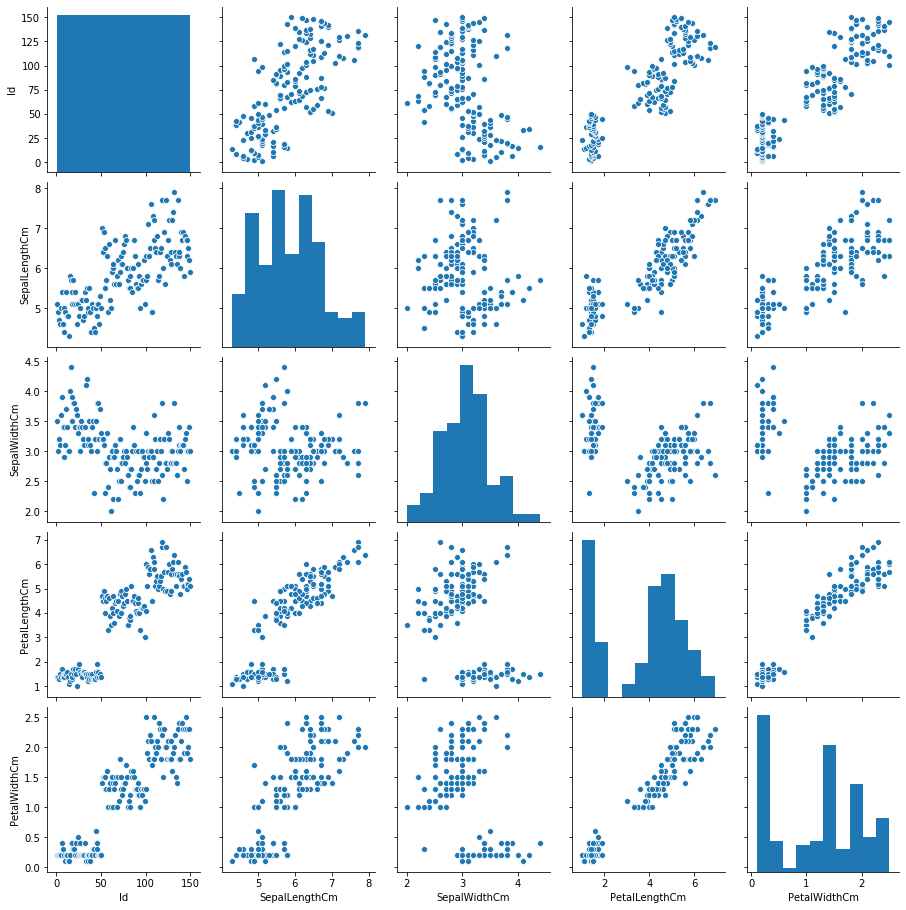

In [30]:
import seaborn as sns

sns.pairplot(df)

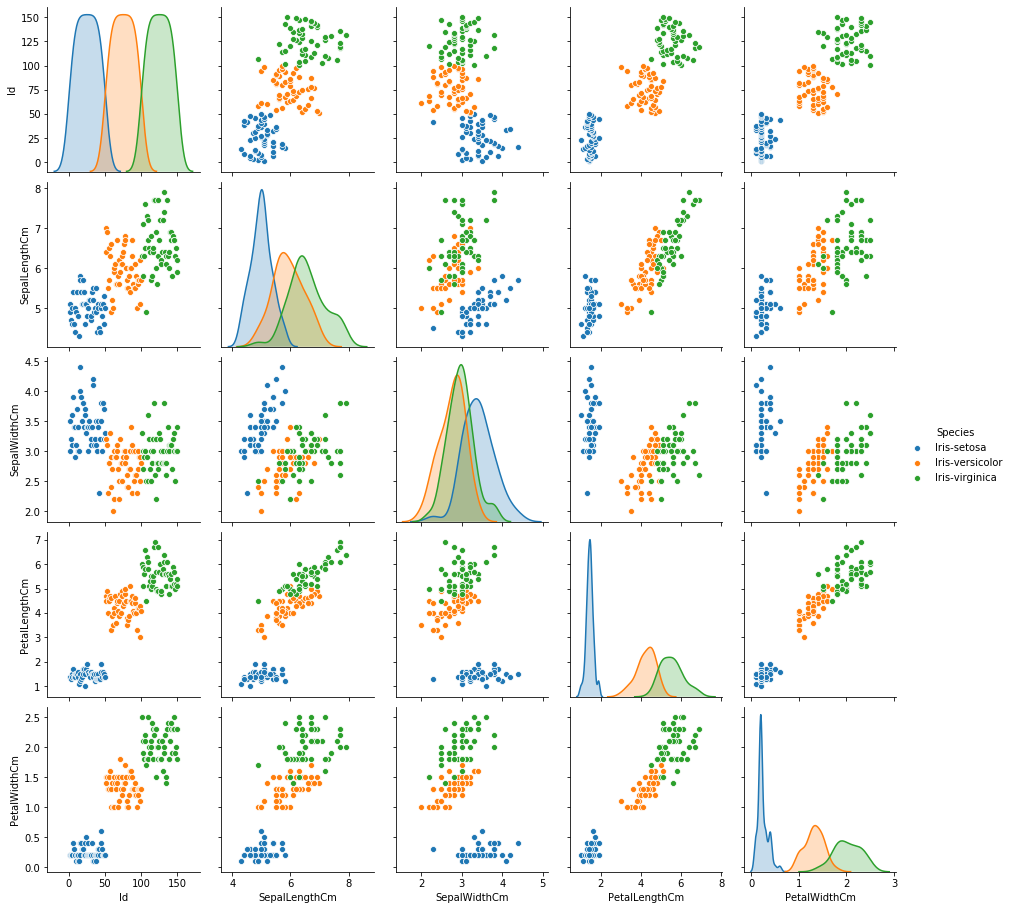

In [43]:
sns.pairplot(df, hue='Species')

In [44]:
x = df.iloc[:,1:5].values
y = df.iloc[:,-1]

In [48]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=0)

In [51]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
pred_y = dtree.predict(test_x)

In [53]:
pred_y

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(test_y, pred_y)
accuracy

1.0

In [62]:
confusion_matrix(pred_y, test_y)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [93]:
print(classification_report(test_y, pred_y))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



[Text(167.4, 199.32, 'X[3] <= 0.8\nentropy = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\nentropy = 0.444\nsamples = 3\nvalue =

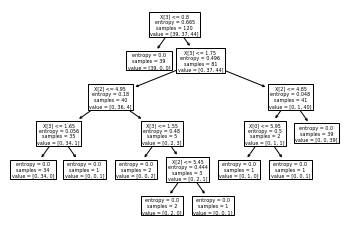

In [63]:
tree.plot_tree(dtree)

[Text(464.99999999999994, 830.5, 'PetalWidthCm <= 0.8\nentropy = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris-setosa'),
 Text(393.46153846153845, 679.5, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(536.5384615384615, 679.5, 'PetalWidthCm <= 1.75\nentropy = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = Iris-setosa'),
 Text(286.15384615384613, 528.5, 'PetalLengthCm <= 4.95\nentropy = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-versicolor'),
 Text(143.07692307692307, 377.5, 'PetalWidthCm <= 1.65\nentropy = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-versicolor'),
 Text(71.53846153846153, 226.5, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-versicolor'),
 Text(214.61538461538458, 226.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-setosa'),
 Text(429.23076923076917, 377.5, 'PetalWidthCm <= 1.55\nentropy = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = Iris-setosa'),
 Text(357.6923076923077,

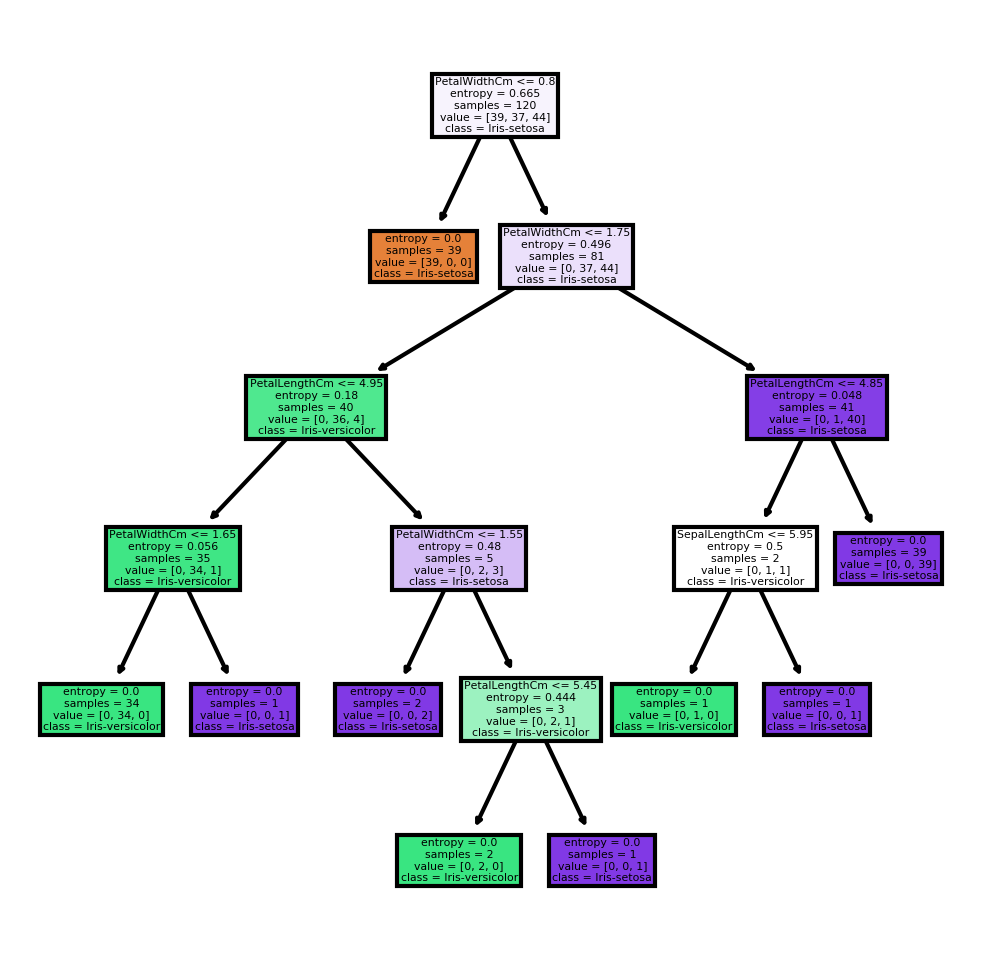

In [83]:
import matplotlib.pyplot as plt

feature = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
label = ['Iris-setosa','Iris-versicolor','Iris-setosa']

plt.subplots(dpi=300, figsize=(4,4)) 
tree.plot_tree(dtree, feature_names=feature, class_names=label, filled=True)